# Visualizations with R and ggplot2
## 1. Composition
### Waffle Chart
* useful for showing categorical composition of the total population
* use geom_tile( ) and manipulate ggplot2 - currently no direct waffle function

In [9]:
mpg <- read.csv("http://goo.gl/uEeRGu")

library(ggplot2)
theme_set(theme_bw())

In [10]:
var <- mpg$class

nrows <- 10
df <- expand.grid(y = 1:nrows, x =1:nrows)

categ_table <- round(table(var) * ((nrows*nrows)/(length(var))))
categ_table

var
   2seater    compact    midsize    minivan     pickup subcompact        suv 
         2         20         18          5         14         15         26 

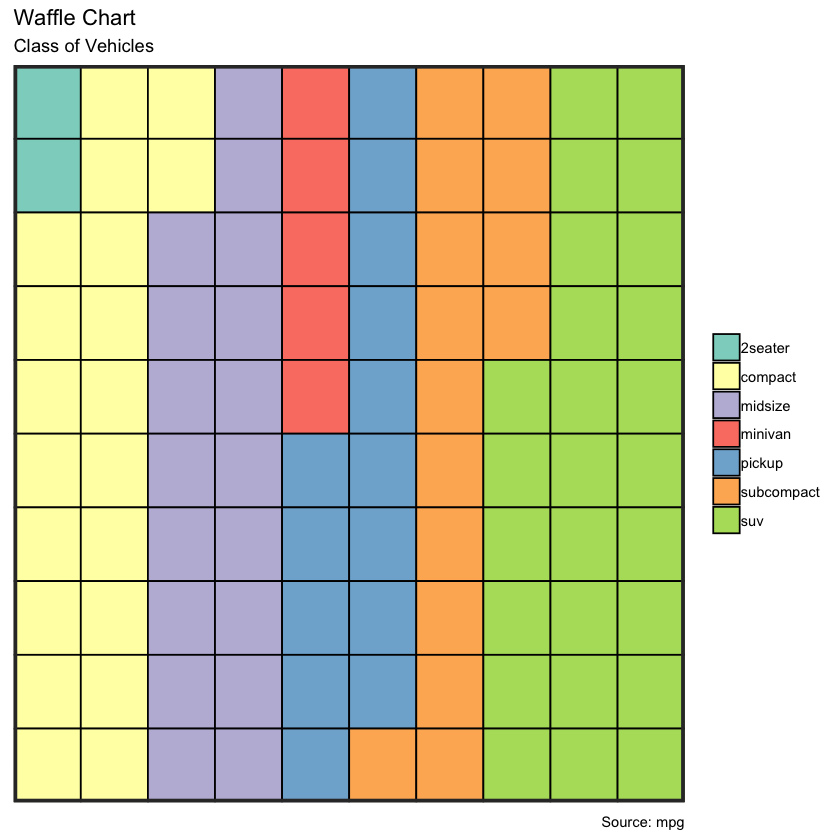

In [11]:
df$category <- factor(rep(names(categ_table), categ_table))

ggplot(df, aes(x=x, y=y, fill=category)) + 
    geom_tile(color="black", size=0.5) + 
    scale_x_continuous(expand=c(0,0)) + 
    scale_y_continuous(expand=c(0,0), trans='reverse') +
    scale_fill_brewer(palette="Set3") +
    labs(title="Waffle Chart",
        subtitle="Class of Vehicles",
        caption="Source: mpg") +
    theme(panel.border=element_rect(size=2),
          plot.title=element_text(size=rel(1.2)),
          axis.text=element_blank(),
          axis.title=element_blank(),
          axis.ticks=element_blank(),
          legend.title=element_blank(),
          legend.position="right")

### Pie Chart
* shows similar composition as above, in a circle with slices
* use coord_polar( )

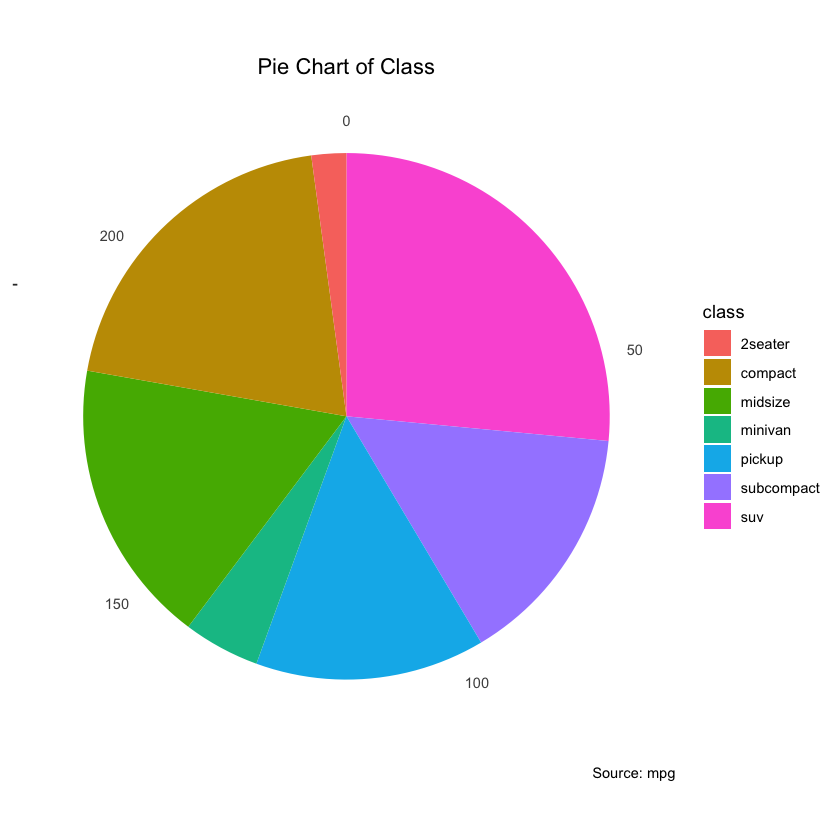

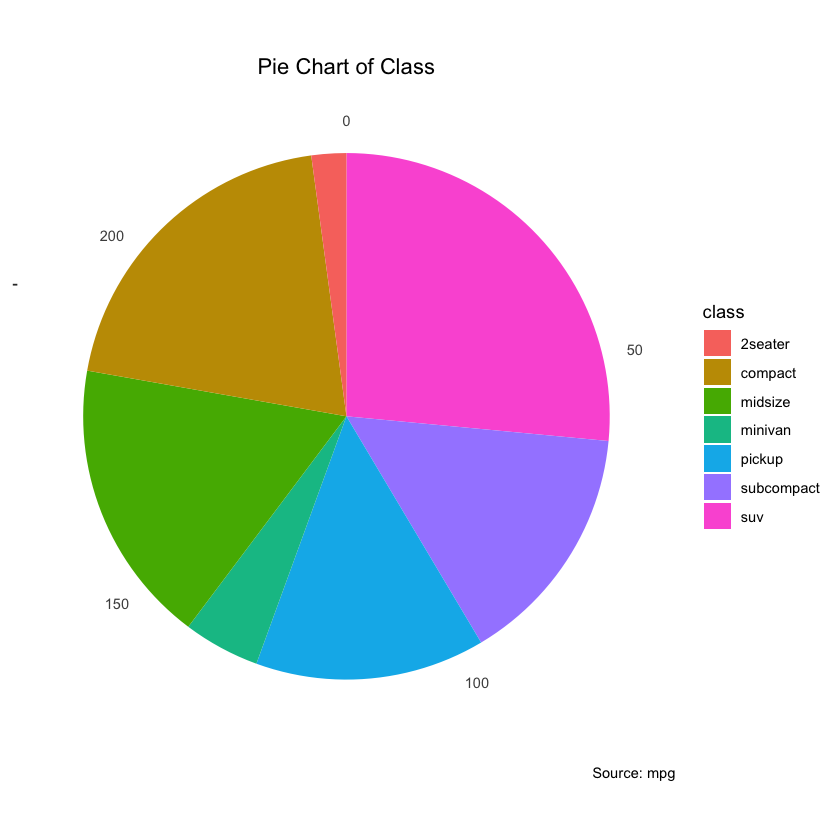

In [14]:
library(ggplot2)
theme_set(theme_classic())

df <- as.data.frame(table(mpg$class))

colnames(df) <- c("class", "freq")

pie <- ggplot(df, aes(x= "", y=freq, fill=factor(class))) +
    geom_bar(width=1, stat='identity') +
    theme(axis.line = element_blank(),
        plot.title = element_text(hjust=0.5)) + 
    labs(fill="class",
        x=NULL,
        y=NULL,
        title="Pie Chart of Class",
        caption="Source: mpg")

pie + coord_polar(theta="y", start=0)

pie <- ggplot(mpg, aes(x="", fill=factor(class))) + 
    geom_bar(width=1) +
    theme(axis.line = element_blank(),
         plot.title = element_text(hjust=0.5)) +
    labs(fill="class",
        x=NULL,
        y=NULL,
        title="Pie Chart of Class",
        caption="Source: mpg")

pie + coord_polar(theta="y", start=0)

### Bar Chart
* geom_bar( ) - will give histogram by default (if only X is provided, and stat=count)
* for bar chart - set stat=identity (and provide X AND y)

In [26]:
freqtable <- table(mpg$manufacturer)
df <- as.data.frame.table(freqtable)
head(df)

Var1,Freq
audi,18
chevrolet,19
dodge,37
ford,25
honda,9
hyundai,14


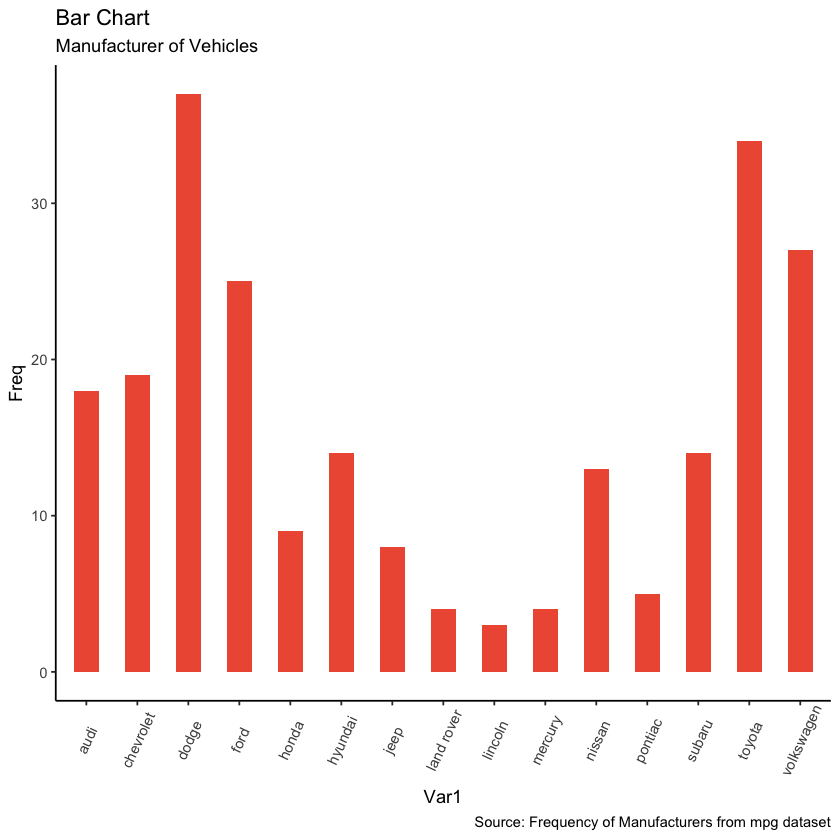

In [28]:
library(ggplot2)
theme_set(theme_classic())

g <- ggplot(df, aes(Var1, Freq))
g + geom_bar(stat="identity", width=0.5, fill="tomato2") +
    labs(title="Bar Chart",
         subtitle="Manufacturer of Vehicles",
         caption="Source: Frequency of Manufacturers from mpg dataset") +
    theme(axis.text.x = element_text(angle=65, vjust=0.6))

* this can be computed from a column variable directly too
* only X will be provided and stat is not set to identity

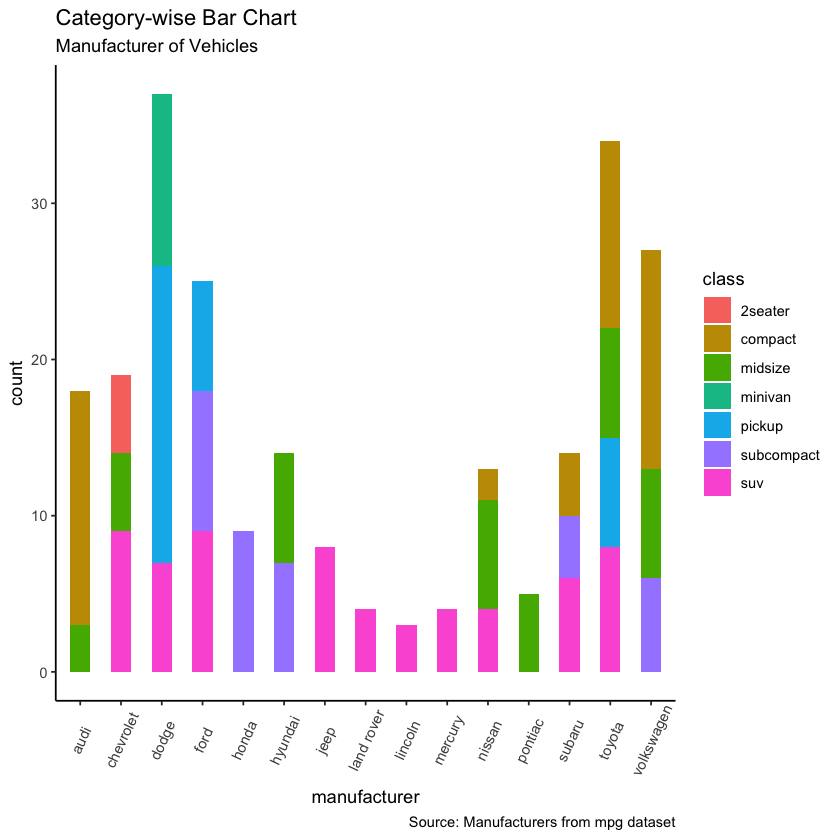

In [29]:
g <- ggplot(mpg, aes(manufacturer))
g + geom_bar(aes(fill=class), width=0.5) +
    theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
    labs(title="Category-wise Bar Chart",
        subtitle="Manufacturer of Vehicles",
        caption="Source: Manufacturers from mpg dataset")

# 2. Change
## Calendar Heatmap
* for seeing variation (especially highs vs. lows) of a metric - on a calendar
* focuses on variation over time, more than values

In [30]:
install.packages("plyr")


The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//RtmpmWGV7T/downloaded_packages


In [31]:
install.packages("zoo")


The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//RtmpmWGV7T/downloaded_packages


In [32]:
library(ggplot2)
library(plyr)
library(scales)
library(zoo)

df <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv")

df$date <- as.Date(df$date)
df <- df[df$year >= 2012, ]

df$yearmonth <- as.yearmon(df$date)
df$yearmonthf <- factor(df$yearmonth)
df <- ddply(df,.(yearmonthf), transform, monthweek=1+week-min(week))

df <- df[, c("year", "yearmonthf", "monthf", "week", "monthweek", "weekdayf", "VIX.Close")]

head(df)

Warning message:
“package ‘zoo’ was built under R version 3.5.2”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



year,yearmonthf,monthf,week,monthweek,weekdayf,VIX.Close
2012,Jan 2012,Jan,1,1,Tue,22.97
2012,Jan 2012,Jan,1,1,Wed,22.22
2012,Jan 2012,Jan,1,1,Thu,21.48
2012,Jan 2012,Jan,1,1,Fri,20.63
2012,Jan 2012,Jan,2,2,Mon,21.07
2012,Jan 2012,Jan,2,2,Tue,20.69


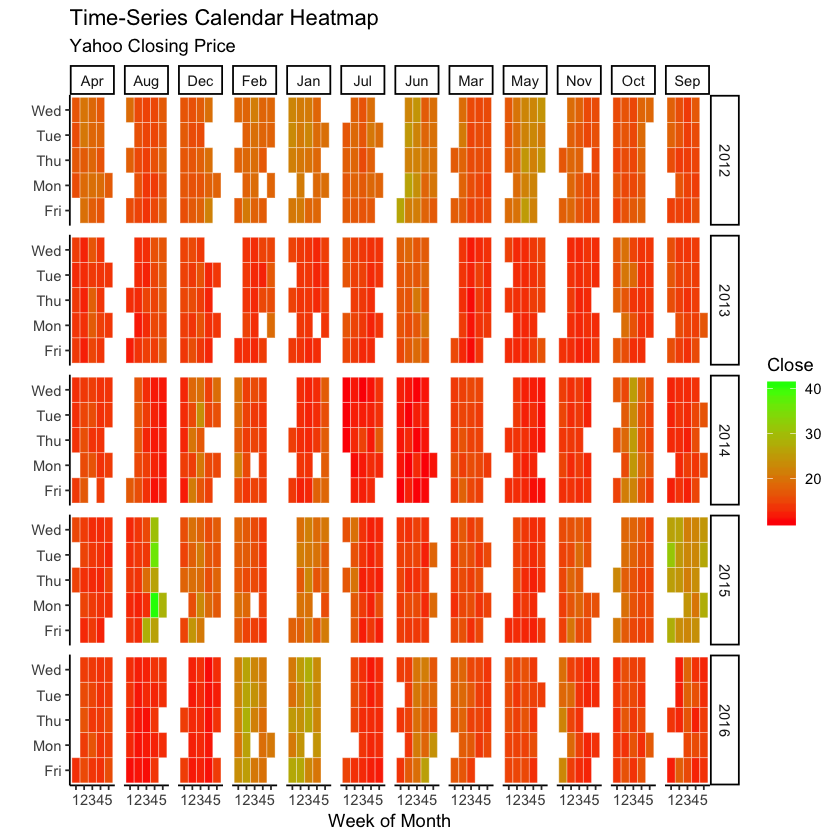

In [33]:
ggplot(df, aes(monthweek, weekdayf, fill=VIX.Close)) +
    geom_tile(color="white") +
    facet_grid(year~monthf) +
    scale_fill_gradient(low="red", high="green") +
    labs(x="Week of Month",
        y="",
        title="Time-Series Calendar Heatmap",
        subtitle="Yahoo Closing Price",
        fill="Close")

### Slope Chart
* for viewing value change and ranking between categories
* more preferable (over a time series) when there are very few points

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), 

“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font databa

“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font databa

“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in Post

“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in Post

“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font databa

“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font databa

“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font databa

“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font databa

“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font dat

“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'American Typewriter' not found in PostScript font databa

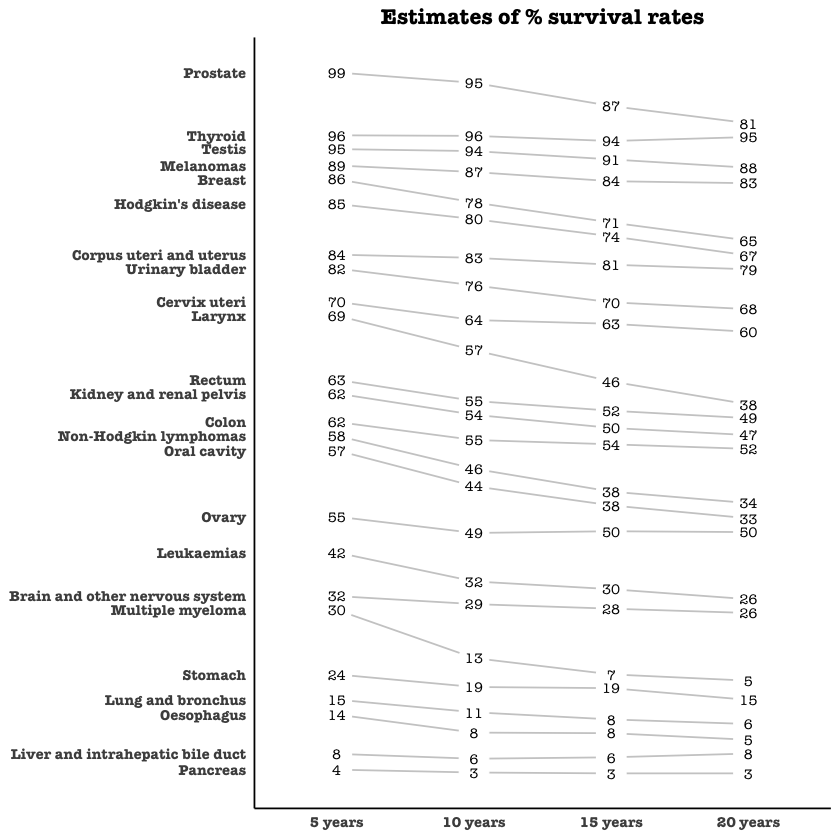

In [36]:
library(dplyr)
theme_set(theme_classic())
source_df <- read.csv("https://raw.githubusercontent.com/jkeirstead/r-slopegraph/master/cancer_survival_rates.csv")

tufte_sort <- function(df, x="year", y="value", group="group", method="tufte", min.space=0.05) {
    ## First rename the columns for consistency
    ids <- match(c(x, y, group), names(df))
    df <- df[,ids]
    names(df) <- c("x", "y", "group")

    ## Expand grid to ensure every combination has a defined value
    tmp <- expand.grid(x=unique(df$x), group=unique(df$group))
    tmp <- merge(df, tmp, all.y=TRUE)
    df <- mutate(tmp, y=ifelse(is.na(y), 0, y))
  
    ## Cast into a matrix shape and arrange by first column
    require(reshape2)
    tmp <- dcast(df, group ~ x, value.var="y")
    ord <- order(tmp[,2])
    tmp <- tmp[ord,]
    
    min.space <- min.space*diff(range(tmp[,-1]))
    yshift <- numeric(nrow(tmp))
    ## Start at "bottom" row
    ## Repeat for rest of the rows until you hit the top
    for (i in 2:nrow(tmp)) {
        ## Shift subsequent row up by equal space so gap between
        ## two entries is >= minimum
        mat <- as.matrix(tmp[(i-1):i, -1])
        d.min <- min(diff(mat))
        yshift[i] <- ifelse(d.min < min.space, min.space - d.min, 0)
    }

    
    tmp <- cbind(tmp, yshift=cumsum(yshift))

    scale <- 1
    tmp <- melt(tmp, id=c("group", "yshift"), variable.name="x", value.name="y")
    ## Store these gaps in a separate variable so that they can be scaled ypos = a*yshift + y

    tmp <- transform(tmp, ypos=y + scale*yshift)
    return(tmp)
   
}

plot_slopegraph <- function(df) {
    ylabs <- subset(df, x==head(x,1))$group
    yvals <- subset(df, x==head(x,1))$ypos
    fontSize <- 3
    gg <- ggplot(df,aes(x=x,y=ypos)) +
        geom_line(aes(group=group),colour="grey80") +
        geom_point(colour="white",size=8) +
        geom_text(aes(label=y), size=fontSize, family="American Typewriter") +
        scale_y_continuous(name="", breaks=yvals, labels=ylabs)
    return(gg)
}    

## Prepare data    
df <- tufte_sort(source_df, 
                 x="year", 
                 y="value", 
                 group="group", 
                 method="tufte", 
                 min.space=0.05)

df <- transform(df, 
                x=factor(x, levels=c(5,10,15,20), 
                            labels=c("5 years","10 years","15 years","20 years")), 
                y=round(y))

## Plot
plot_slopegraph(df) + labs(title="Estimates of % survival rates") + 
                      theme(axis.title=element_blank(),
                            axis.ticks = element_blank(),
                            plot.title = element_text(hjust=0.5,
                                                      family = "American Typewriter",
                                                      face="bold"),
                            axis.text = element_text(family = "American Typewriter",
                                                     face="bold"))